# Seaborn

Seaborn es una biblioteca para gráficos estadísticos en Python. Está construida sobre matplotlib y está estrechamente integrada con las estructuras de datos de Pandas. Estas son algunas de las funciones que ofrece seaborn:
- Una API orientada al conjunto de datos para examinar las relaciones entre múltiples variables
- Soporte especializado para usar variables categóricas para mostrar observaciones o estadísticas agregadas
- Opciones para visualizar distribuciones univariadas o bivariadas y para compararlas con subconjuntos de datos
- Estimación automática y trazado de modelos de regresión lineal para diferentes tipos de variables dependientes
- Vistas sobre la estructura general de conjuntos de datos complejos
- Abstracciones de alto nivel para estructurar cuadrículas de múltiples gráficos que le permiten crear fácilmente visualizaciones complejas
- Control conciso sobre el estilo de figura matplotlib con varios temas incorporados
- Herramientas para elegir paletas de colores que revelen fielmente patrones en sus datos

## Scatter plots

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
tips.head(10)  # Pandas dataframe

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


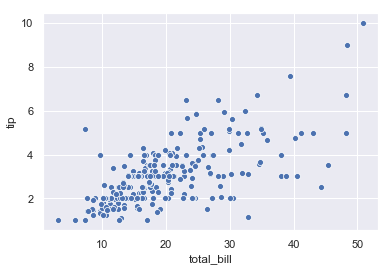

In [35]:
sns.scatterplot(x="total_bill", y="tip", data=tips);

Si bien los puntos se trazan en dos dimensiones, se puede agregar otra dimensión al diagrama coloreando los puntos de acuerdo con una tercera variable. En seaborn, esto se conoce como el uso del **tono semántico** (semantic hue), porque el color del punto adquiere significado:

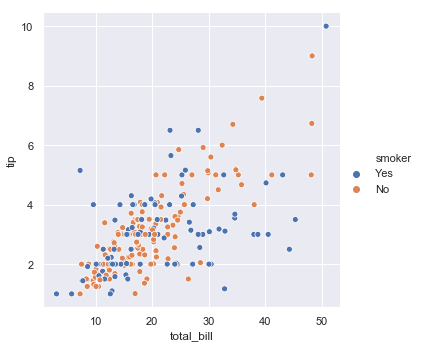

In [36]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

También es posible representar cuatro variables cambiando el tono y el estilo de cada punto de manera independiente. Pero esto debe hacerse con cuidado, porque el ojo es mucho menos sensible a la forma que al color:

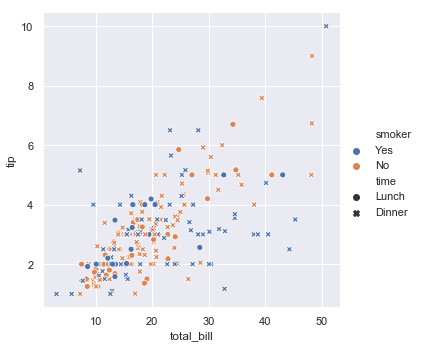

In [37]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

En los ejemplos anteriores, el tono semántico era categórico, por lo que se aplicó la paleta cualitativa predeterminada. Si el tono semántico es numérico (específicamente, si se puede convertir en flotante), el color predeterminado cambia a una paleta progresiva:

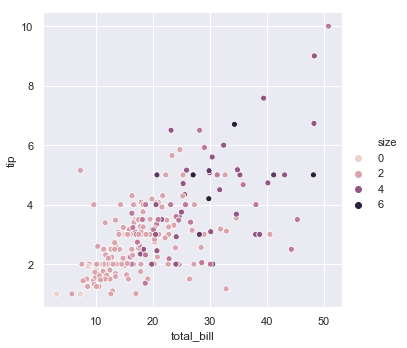

In [38]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

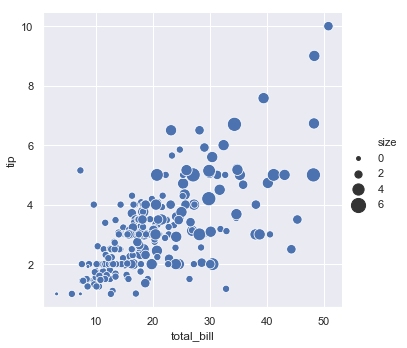

In [40]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

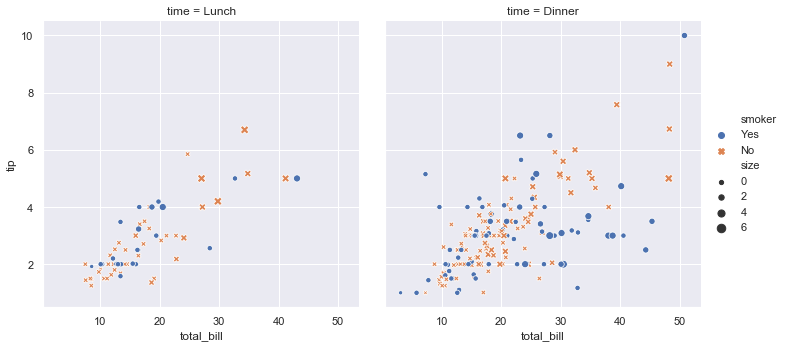

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()
tips = sns.load_dataset("tips")

sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);


## Line plots

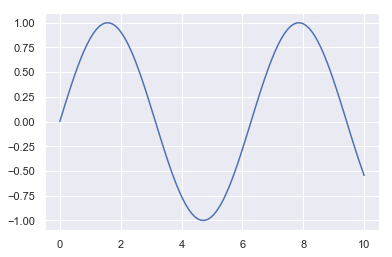

In [44]:
import numpy as np
X = np.linspace(start = 0, stop = 10, num = 100)
Y = np.sin(X)

sns.lineplot(x=X, y=Y)

### Agregación y representación de la incertidumbre.

Los conjuntos de datos más complejos tendrán múltiples mediciones para el mismo valor de la variable $x$. El comportamiento predeterminado de Seaborn es agregar las mediciones múltiples de cada valor de x trazando la media y el intervalo de confianza del 95% alrededor de la media:

  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970
5      s9         18  stim  parietal -0.103513
6      s8         18  stim  parietal -0.064408
7      s7         18  stim  parietal -0.060526
8      s6         18  stim  parietal -0.007029
9      s5         18  stim  parietal -0.040557


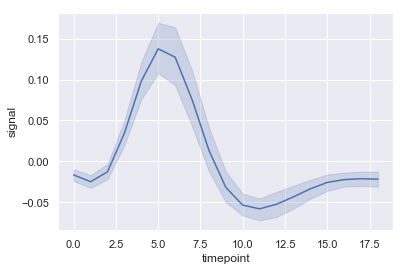

In [49]:
fmri = sns.load_dataset("fmri")
print(fmri.head(10))
sns.lineplot(x="timepoint", y="signal", data=fmri);

Otra buena opción, especialmente con datos más grandes, es representar la extensión de la distribución en cada punto trazando la desviación estándar en lugar de un intervalo de confianza:

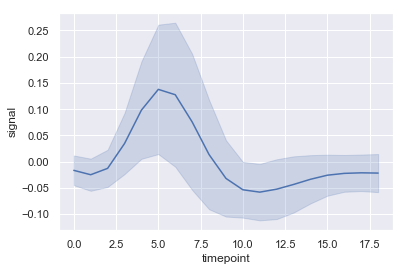

In [50]:
sns.lineplot(x="timepoint", y="signal", data=fmri, ci="sd");

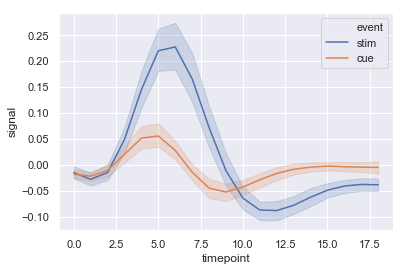

In [61]:
sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri);

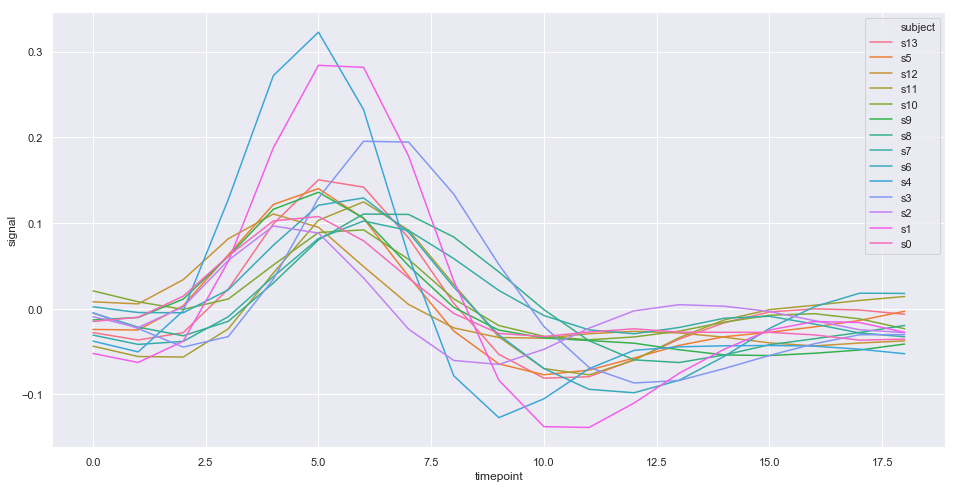

In [64]:
plt.figure(figsize=(16, 8))
sns.lineplot(x="timepoint", y="signal", hue="subject", ci=None, data=fmri);

## Representación de datos categóricos

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


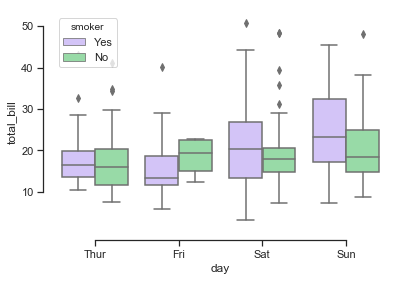

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)

sns.despine(offset=10, trim=True)

tips.head(10)


## Regresión lineal

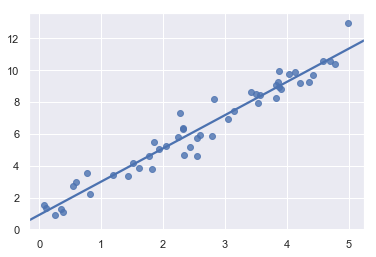

In [31]:
mu, sigma = 0, 0.75 # mean and standard deviation

samples = 50
noise = np.random.normal(mu, sigma, samples)

X = np.random.rand(samples)*5
Y = 2*X + 1 + noise

sns.regplot(x=X, y=Y, ci=None);  # ci = confidence interval 0->100

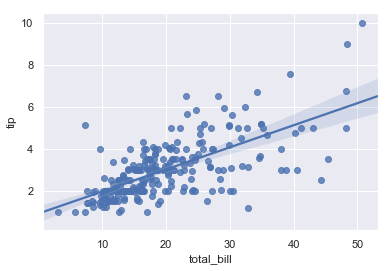

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

tips = sns.load_dataset("tips")

sns.regplot(x="total_bill", y="tip", data=tips);